# Clustering

Clustering is a technique used in machine learning and data analysis to group similar objects or data points together based on their inherent characteristics or features. The goal of clustering is to identify natural groupings or patterns within a dataset, where objects within the same group are more similar to each other than to those in other groups.

In clustering, no predefined labels or categories are provided to the algorithm. Instead, the algorithm analyzes the data and assigns objects to clusters based on their similarity. The similarity between objects is determined by considering the features or attributes of the data points. Commonly used clustering algorithms include k-means, hierarchical clustering, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

## K means algorithm

K-means is one of the most widely used clustering algorithms in machine learning and data analysis. It aims to partition a given dataset into k clusters, where each data point belongs to the cluster with the nearest mean (centroid). The goal of K-means is to minimize the sum of squared distances between the data points and their respective cluster centroids.

In this example, we will be clustering movie/show titles based on their ratings (High, Medium, Low)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

titles = pd.read_csv('../../preprocessing/titles_preprocessed.csv')

In [2]:
titles

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.200000,89766.000000,8.647
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.800000,57835.000000,11.270
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,"['thriller', 'drama', 'crime']",['US'],0.0,tt0037638,7.300000,17233.000000,7.757
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,"['crime', 'drama']",['US'],0.0,tt0026683,4.000000,864.000000,3.748
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,"['history', 'drama']",['US'],0.0,tt0006864,7.700000,15242.000000,9.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,tm975981,Cher & the Loneliest Elephant,MOVIE,"""The World's Loneliest Elephant"" Kaavan will f...",2021,46,['documentation'],"['KH', 'PK', 'GB', 'US']",0.0,tt14303400,7.600000,237.000000,1.758
2653,ts296262,Searching for Secrets,SHOW,Journey back in time to uncover buried tales i...,2021,44,['documentation'],"['GB', 'US']",1.0,tt18259488,6.046369,22272.758145,0.600
2654,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,Follow soccer journalist Guillem Belagué as he...,2021,85,['documentation'],[],0.0,tt15430722,7.700000,8.000000,0.600
2655,ts305329,House Calls with Dr. Phil,SHOW,The talk show legend travels across the countr...,2021,43,['reality'],['US'],1.0,tt15176234,5.400000,35.000000,0.600


### Preprocessing

In [3]:
# First, we're going to take a look at what the "genres" attribute look like.

genres = titles['genres']
genres_split = genres.str.split(',')
    
genres_cleaned = []
for genre_list in genres_split:
    print(genre_list)

["['action'", " 'drama'", " 'war'", " 'western'", " 'comedy'", " 'european']"]
["['comedy'", " 'drama'", " 'romance']"]
["['thriller'", " 'drama'", " 'crime']"]
["['crime'", " 'drama']"]
["['history'", " 'drama']"]
["['thriller'", " 'crime'", " 'drama']"]
["['horror']"]
["['thriller'", " 'horror'", " 'action']"]
["['drama'", " 'romance'", " 'family'", " 'action'", " 'comedy']"]
["['drama'", " 'comedy'", " 'family']"]
["['drama'", " 'romance']"]
["['thriller'", " 'drama']"]
["['comedy'", " 'drama'", " 'romance']"]
["['romance'", " 'family'", " 'fantasy']"]
["['crime'", " 'comedy'", " 'thriller'", " 'drama']"]
["['fantasy'", " 'family'", " 'action']"]
["['romance'", " 'drama'", " 'comedy']"]
["['drama'", " 'romance']"]
["['romance'", " 'drama'", " 'family']"]
["['comedy'", " 'drama'", " 'family']"]
["['drama'", " 'sport']"]
["['thriller'", " 'romance'", " 'drama']"]
["['comedy']"]
["['romance'", " 'comedy'", " 'drama']"]
["['comedy'", " 'drama'", " 'thriller'", " 'crime'", " 'romance']"]

In [4]:
# This is not very convenient for us to work with. 
# https://www.kaggle.com/code/thomaslazarus/streaming-service-data-analysis - this code had a good idea on what to do in this 
# scenario, so I copied their idea.

titles["genres"] = titles.apply(lambda row: row["genres"].replace('[', '').replace(']', '').replace("'", "").split(", "), axis=1)
genre_df = pd.DataFrame(titles.genres.values.tolist(), titles.index).add_prefix('genre_')
genre_df.head()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,action,drama,war,western,comedy,european,None,None,None
1,comedy,drama,romance,None,None,None,None,None,None
2,thriller,drama,crime,None,None,None,None,None,None
3,crime,drama,None,None,None,None,None,None,None
4,history,drama,None,None,None,None,None,None,None


In [5]:
titles = (titles.join(genre_df).drop(columns=["genres"]))
titles.head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,...,tmdb_popularity,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.2,...,8.647,action,drama,war,western,comedy,european,None,None,None
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.8,...,11.270,comedy,drama,romance,None,None,None,None,None,None
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.3,...,7.757,thriller,drama,crime,None,None,None,None,None,None
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.0,...,3.748,crime,drama,None,None,None,None,None,None,None
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.7,...,9.412,history,drama,None,None,None,None,None,None,None


In [6]:
# We can just focus on the top genre - usually, that should be enough to describe a movie

titles = titles.drop(columns=["genre_1", "genre_2", "genre_3", "genre_4", "genre_5", "genre_6", "genre_7", "genre_8"])

In [7]:
# Cleaning up the rest of the data 

titles.dropna(subset=['genre_0'], inplace=True)
titles.rename(columns={'genre_0': 'genre'}, inplace=True)

In [8]:
titles

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.200000,89766.000000,8.647,action
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.800000,57835.000000,11.270,comedy
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.300000,17233.000000,7.757,thriller
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.000000,864.000000,3.748,crime
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.700000,15242.000000,9.412,history
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,tm975981,Cher & the Loneliest Elephant,MOVIE,"""The World's Loneliest Elephant"" Kaavan will f...",2021,46,"['KH', 'PK', 'GB', 'US']",0.0,tt14303400,7.600000,237.000000,1.758,documentation
2653,ts296262,Searching for Secrets,SHOW,Journey back in time to uncover buried tales i...,2021,44,"['GB', 'US']",1.0,tt18259488,6.046369,22272.758145,0.600,documentation
2654,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,Follow soccer journalist Guillem Belagué as he...,2021,85,[],0.0,tt15430722,7.700000,8.000000,0.600,documentation
2655,ts305329,House Calls with Dr. Phil,SHOW,The talk show legend travels across the countr...,2021,43,['US'],1.0,tt15176234,5.400000,35.000000,0.600,reality


In [9]:
# Turning the type and genre into a categorical attributes
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(titles['type'])
titles['encoded_type'] = label_encoder.transform(titles['type'])

label_encoder.fit(titles['genre'])
titles['encoded_genre'] = label_encoder.transform(titles['genre'])

titles

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre,encoded_type,encoded_genre
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.200000,89766.000000,8.647,action,0,1
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.800000,57835.000000,11.270,comedy,0,3
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.300000,17233.000000,7.757,thriller,0,16
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.000000,864.000000,3.748,crime,0,4
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.700000,15242.000000,9.412,history,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,tm975981,Cher & the Loneliest Elephant,MOVIE,"""The World's Loneliest Elephant"" Kaavan will f...",2021,46,"['KH', 'PK', 'GB', 'US']",0.0,tt14303400,7.600000,237.000000,1.758,documentation,0,5
2653,ts296262,Searching for Secrets,SHOW,Journey back in time to uncover buried tales i...,2021,44,"['GB', 'US']",1.0,tt18259488,6.046369,22272.758145,0.600,documentation,1,5
2654,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,Follow soccer journalist Guillem Belagué as he...,2021,85,[],0.0,tt15430722,7.700000,8.000000,0.600,documentation,0,5
2655,ts305329,House Calls with Dr. Phil,SHOW,The talk show legend travels across the countr...,2021,43,['US'],1.0,tt15176234,5.400000,35.000000,0.600,reality,1,12


In [10]:
# Creating the score bins

# IMDB score bins (0-5.5 - Low, 5.5-6.6 - Medium, 6.6-10 - High)
bins = [0, 5.5, 6.6, 10]
# Class labels
labels = ['Low-Rated', 'Medium-Rated', 'High-Rated']  

# Bin the IMDb scores into different ranges and assign labels
titles['imdb_score_bin'] = pd.cut(titles['imdb_score'], bins=bins, labels=labels)

titles

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre,encoded_type,encoded_genre,imdb_score_bin
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.200000,89766.000000,8.647,action,0,1,High-Rated
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.800000,57835.000000,11.270,comedy,0,3,High-Rated
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.300000,17233.000000,7.757,thriller,0,16,High-Rated
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.000000,864.000000,3.748,crime,0,4,Low-Rated
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.700000,15242.000000,9.412,history,0,9,High-Rated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,tm975981,Cher & the Loneliest Elephant,MOVIE,"""The World's Loneliest Elephant"" Kaavan will f...",2021,46,"['KH', 'PK', 'GB', 'US']",0.0,tt14303400,7.600000,237.000000,1.758,documentation,0,5,High-Rated
2653,ts296262,Searching for Secrets,SHOW,Journey back in time to uncover buried tales i...,2021,44,"['GB', 'US']",1.0,tt18259488,6.046369,22272.758145,0.600,documentation,1,5,Medium-Rated
2654,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,Follow soccer journalist Guillem Belagué as he...,2021,85,[],0.0,tt15430722,7.700000,8.000000,0.600,documentation,0,5,High-Rated
2655,ts305329,House Calls with Dr. Phil,SHOW,The talk show legend travels across the countr...,2021,43,['US'],1.0,tt15176234,5.400000,35.000000,0.600,reality,1,12,Low-Rated


In [11]:
print(titles[titles["imdb_score_bin"] == "Low-Rated" ].shape)
print(titles[titles["imdb_score_bin"] == "Medium-Rated" ].shape)
print(titles[titles["imdb_score_bin"] == "High-Rated" ].shape)

(882, 16)
(914, 16)
(861, 16)


In [12]:
titles = titles.drop(columns=["production_countries", "imdb_votes", "tmdb_popularity"])

In [13]:
titles

,id,title,type,description,release_year,runtime,seasons,imdb_id,imdb_score,genre,encoded_type,encoded_genre,imdb_score_bin
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,0.0,tt0017925,8.200000,action,0,1,High-Rated
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,0.0,tt0032599,7.800000,comedy,0,3,High-Rated
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,0.0,tt0037638,7.300000,thriller,0,16,High-Rated
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,0.0,tt0026683,4.000000,crime,0,4,Low-Rated
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,0.0,tt0006864,7.700000,history,0,9,High-Rated
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,tm975981,Cher & the Loneliest Elephant,MOVIE,"""The World's Loneliest Elephant"" Kaavan will f...",2021,46,0.0,tt14303400,7.600000,documentation,0,5,High-Rated
2653,ts296262,Searching for Secrets,SHOW,Journey back in time to uncover buried tales i...,2021,44,1.0,tt18259488,6.046369,documentation,1,5,Medium-Rated
2654,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,Follow soccer journalist Guillem Belagué as he...,2021,85,0.0,tt15430722,7.700000,documentation,0,5,High-Rated
2655,ts305329,House Calls with Dr. Phil,SHOW,The talk show legend travels across the countr...,2021,43,1.0,tt15176234,5.400000,reality,1,12,Low-Rated


In [14]:
from sklearn.cluster import KMeans

In [15]:
features = titles[['runtime', 'release_year', 'seasons', 'encoded_type', 'encoded_genre']].values

In [16]:
features

array([[7.800e+01, 1.926e+03, 0.000e+00, 0.000e+00, 1.000e+00],
       [9.200e+01, 1.940e+03, 0.000e+00, 0.000e+00, 3.000e+00],
       [6.600e+01, 1.945e+03, 0.000e+00, 0.000e+00, 1.600e+01],
       ...,
       [8.500e+01, 2.021e+03, 0.000e+00, 0.000e+00, 5.000e+00],
       [4.300e+01, 2.021e+03, 1.000e+00, 1.000e+00, 1.200e+01],
       [8.900e+01, 2.021e+03, 0.000e+00, 0.000e+00, 5.000e+00]])

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [18]:
num_clusters = 3  # Defining the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [29]:
# Get the cluster labels for each title
cluster_labels = kmeans.labels_

# Add cluster labels to the titles dataset
titles['cluster_label'] = cluster_labels

In [20]:
titles[kmeans.labels_== 0]

,id,title,type,description,release_year,runtime,seasons,imdb_id,imdb_score,genre,encoded_type,encoded_genre,imdb_score_bin,cluster_label
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,0.0,tt0017925,8.2,action,0,1,High-Rated,0
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,0.0,tt0032599,7.8,comedy,0,3,High-Rated,0
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,0.0,tt0037638,7.3,thriller,0,16,High-Rated,0
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,0.0,tt0026683,4.0,crime,0,4,Low-Rated,0
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,0.0,tt0006864,7.7,history,0,9,High-Rated,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,tm166988,Calendar Girl Murders,MOVIE,Millionaire Richard Trainor is rolling out a n...,1984,100,0.0,tt0087022,4.7,thriller,0,16,Low-Rated,0
1029,tm64825,Through Naked Eyes,MOVIE,A musician living in an apartment building lik...,1983,91,0.0,tt0088265,5.6,thriller,0,16,Medium-Rated,0
1046,tm41521,Slipping Into Darkness,MOVIE,Three spoiled college girls are held responsib...,1988,87,0.0,tt0096120,3.9,thriller,0,16,Low-Rated,0
1199,tm190421,The Shooter,MOVIE,The story is of a small town in the early west...,1997,91,0.0,tt0120121,5.0,western,0,18,Low-Rated,0


In [21]:
titles[kmeans.labels_== 1]

,id,title,type,description,release_year,runtime,seasons,imdb_id,imdb_score,genre,encoded_type,encoded_genre,imdb_score_bin,cluster_label
98,tm134133,Tarzan the Fearless,MOVIE,"Mary Brooks' father, who has been studying anc...",1933,228,0.0,tt0024645,4.900000,action,0,1,Low-Rated,1
537,tm155580,The Godfather,MOVIE,"Spanning the years 1945 to 1955, a chronicle o...",1972,175,0.0,tt0068646,9.200000,drama,0,6,High-Rated,1
540,tm112061,The Godfather: Part II,MOVIE,In the continuing saga of the Corleone crime f...,1974,195,0.0,tt0071562,9.000000,drama,0,6,High-Rated,1
544,tm110158,The Conversation,MOVIE,Surveillance expert Harry Caul is hired by a m...,1974,113,0.0,tt0071360,7.800000,drama,0,6,High-Rated,1
546,tm154519,Cabaret,MOVIE,"Inside the Kit Kat Club of 1931 Berlin, starry...",1972,108,0.0,tt0068327,7.700000,drama,0,6,High-Rated,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,tm1099382,The 26th Street Garage: The FBI's Untold Story...,MOVIE,"The story of ingenuity, teamwork and determina...",2021,58,0.0,tt15392020,5.500000,documentation,0,5,Low-Rated,1
2651,tm1055776,Making Tracks on Mars,MOVIE,"Mars has beckoned humankind for centuries, but...",2021,44,0.0,tt14416044,6.046369,documentation,0,5,Medium-Rated,1
2652,tm975981,Cher & the Loneliest Elephant,MOVIE,"""The World's Loneliest Elephant"" Kaavan will f...",2021,46,0.0,tt14303400,7.600000,documentation,0,5,High-Rated,1
2654,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,Follow soccer journalist Guillem Belagué as he...,2021,85,0.0,tt15430722,7.700000,documentation,0,5,High-Rated,1


In [22]:
titles[kmeans.labels_== 2]

,id,title,type,description,release_year,runtime,seasons,imdb_id,imdb_score,genre,encoded_type,encoded_genre,imdb_score_bin,cluster_label
538,ts22109,The Twilight Zone,SHOW,A series of unrelated stories containing drama...,1959,28,5.0,tt0052520,9.100000,scifi,1,14,High-Rated,2
539,ts21236,Star Trek,SHOW,Star Trek is an American science fiction telev...,1966,50,3.0,tt0060028,8.400000,scifi,1,14,High-Rated,2
543,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,30,9.0,tt0043208,8.500000,comedy,1,3,High-Rated,2
545,ts21682,Happy Days,SHOW,In 1950s Milwaukee the Cunningham family must ...,1974,24,11.0,tt0070992,7.300000,comedy,1,3,High-Rated,2
547,ts22170,Gunsmoke,SHOW,Gunsmoke is an American radio and television W...,1955,49,20.0,tt0047736,8.000000,action,1,1,High-Rated,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,ts279253,Secret Celebrity Renovation,SHOW,"Follow celebrities in sports, music and entert...",2021,43,2.0,tt13836422,4.700000,reality,1,12,Low-Rated,2
2644,ts226272,The Harper House,SHOW,An overconfident female head-of-a-household as...,2021,24,1.0,tt11714502,5.100000,animation,1,2,Low-Rated,2
2648,ts310078,Tha God's Honest Truth with Charlamagne Tha God,SHOW,Nothing is off limits in this weekly late-nigh...,2021,21,1.0,tt15089704,2.300000,comedy,1,3,Low-Rated,2
2653,ts296262,Searching for Secrets,SHOW,Journey back in time to uncover buried tales i...,2021,44,1.0,tt18259488,6.046369,documentation,1,5,Medium-Rated,2


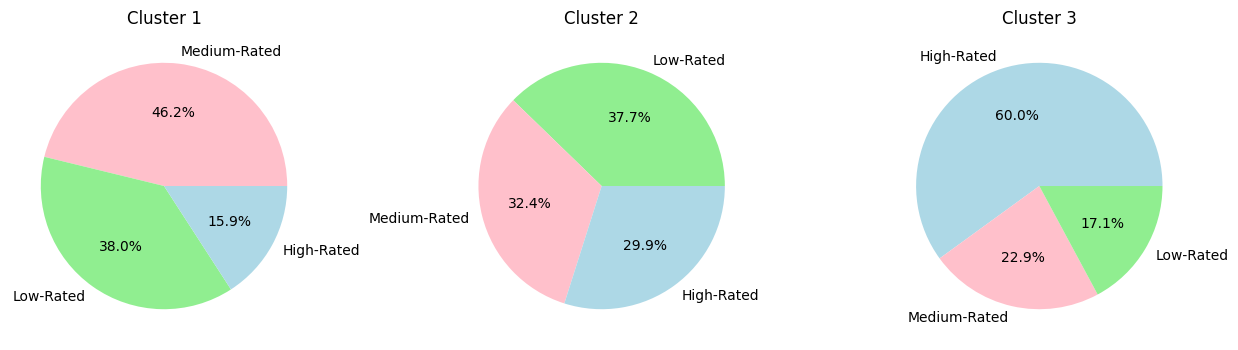

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

titles0 = titles[kmeans.labels_== 0]
titles1 = titles[kmeans.labels_== 1]
titles2 = titles[kmeans.labels_== 2]

attribute_counts = titles0['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['pink', 'lightgreen', 'lightblue']  # Specify colors for each label

axs[0].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title("Cluster 1")


# Extract attribute labels and their frequencies
attribute_counts = titles1['imdb_score_bin'].value_counts()
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightgreen', 'pink', 'lightblue']  # Specify colors for each label

axs[1].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[1].set_title("Cluster 2")

attribute_counts = titles2['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightblue', 'pink', 'lightgreen']  # Specify colors for each label

axs[2].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[2].set_title("Cluster 3")

plt.show()


The classes are not that well divided, as we can see.
However, we notice that:
- Cluster 1 has the highest percentage of Medium-Rated titles
- Cluster 2 has the highest percentage of Low-Rated titles
- Cluster 3 has the hightst percentage (by far!) of High-Rated titles

In [24]:
low_rated_0 = titles0[titles0["imdb_score_bin"] == "Low-Rated"]
print("Low-Rated score mean: " , low_rated_0["imdb_score"].mean())

high_rated_0 = titles0[titles0["imdb_score_bin"] == "High-Rated"]
print("High-Rated score mean: " , high_rated_0["imdb_score"].mean())

average_score_0 = titles0["imdb_score"].mean()
print("Average cluster score: " , average_score_0)

Low-Rated score mean:  4.811184210526315
High-Rated score mean:  7.131496062992128
Average cluster score:  5.740324594257179


In [25]:
low_rated_1 = titles1[titles1["imdb_score_bin"] == "Low-Rated"]
print("Low-Rated score mean: " , low_rated_1["imdb_score"].mean())

high_rated_1 = titles1[titles1["imdb_score_bin"] == "High-Rated"]
print("High-Rated score mean: " , high_rated_1["imdb_score"].mean())

average_score_1 = titles1["imdb_score"].mean()
print("Average cluster score: " , average_score_1)

Low-Rated score mean:  4.623529411764706
High-Rated score mean:  7.372148541114059
Average cluster score:  5.923965191937858


In [26]:
low_rated_2 = titles2[titles2["imdb_score_bin"] == "Low-Rated"]
print("Low-Rated score mean: " , low_rated_2["imdb_score"].mean())

high_rated_2 = titles2[titles2["imdb_score_bin"] == "High-Rated"]
print("High-Rated score mean: " , high_rated_2["imdb_score"].mean())

average_score_2 = titles2["imdb_score"].mean()
print("Average cluster score: " , average_score_2)

Low-Rated score mean:  4.326470588235294
High-Rated score mean:  7.610644257703081
Average cluster score:  6.7177831958471454


In [31]:
num_clusters = 2  # Defining the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Get the cluster labels for each title
cluster_labels = kmeans.labels_

# Add cluster labels to the titles dataset
titles['cluster_label'] = cluster_labels

C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Cluster 2')

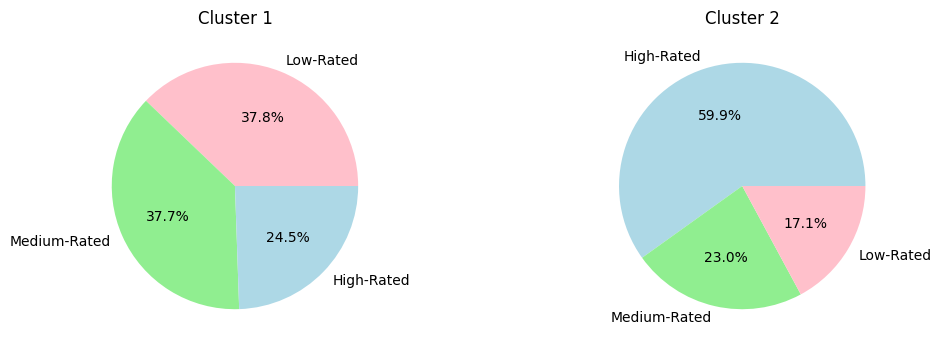

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

titles0 = titles[kmeans.labels_== 0]
titles1 = titles[kmeans.labels_== 1]

attribute_counts = titles0['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['pink', 'lightgreen', 'lightblue']  # Specify colors for each label

axs[0].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title("Cluster 1")


# Extract attribute labels and their frequencies
attribute_counts = titles1['imdb_score_bin'].value_counts()
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightblue', 'lightgreen', 'pink']  # Specify colors for each label


axs[1].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[1].set_title("Cluster 2")

I did this just to check how the algorithm would act if we divided the ratings into two clusters - We can see that, just like in the previous example with 3 clusters, the High-Rated class is emphasized more compared to Medium and Low.